# Шаг0: Импорт библиотек

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

# Шаг 1: Загрузка данных

In [61]:
iris_data = pd.read_csv('/workspaces/spbu-python-course/project/iris.csv')

# Шаг 2: Представление данных в виде массивов

Признаки в матрице (n, 4)

In [62]:
features = iris_data.iloc[:, :-1].values

Названия видов в векторе размера n

In [63]:
labels = iris_data.iloc[:, -1].values 

# Шаг 3: Вывод размера массивов

In [64]:
features_shape = features.shape  # Размерность матрицы признаков
labels_shape = labels.shape  # Размер вектора названий видов

Определим, сколько места занимают массивы

In [65]:
features_size = features.nbytes  # размер матрицы (в байтах)
labels_size = labels.nbytes # размер вектора (в байтах)

# Шаг 4: Вывод результатов 

In [66]:
print("Размер матрицы признаков (n, 4):", features_shape)
print("Размер вектора названий видов (n,):", labels_shape)
print("Размер матрицы признаков в байтах:", features_size)
print("Размер вектора названий видов в байтах:", labels_size)

Размер матрицы признаков (n, 4): (150, 4)
Размер вектора названий видов (n,): (150,)
Размер матрицы признаков в байтах: 4800
Размер вектора названий видов в байтах: 1200


# Шаг 5: Нормализация данных на промежуток от 0 до 1

In [67]:
features_min = features.min(axis=0)  # Минимальные значения для каждой колонки
features_max = features.max(axis=0)  # Максимальные значения для каждой колонки

Нормализуем данные

In [68]:
features_normalized = (features - features_min) / (features_max - features_min)

Проверка результатов. Размеры после нормализации

In [78]:
print("Нормализованные данные:")
print(features_normalized)

Нормализованные данные:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0

In [79]:
print("Размер нормализованной матрицы признаков:", features_normalized.shape)

Размер нормализованной матрицы признаков: (150, 4)


# Шаг 6: Выбор признака для категоризации

In [70]:
feature = iris_data['sepal.length'] 

# Шаг 7: Рассчет квантилей

In [71]:
q1 = feature.quantile(0.25)  # 25-й 
q3 = feature.quantile(0.75)  # 75-й 

# Шаг 8: Определение категориальной переменной

In [72]:
def categorize(value):
    if value < q1:
        return 'small'
    elif q1 <= value <= q3:
        return 'medium'
    else:
        return 'big'

Применение функции к выбранному признаку

In [73]:
categories = feature.apply(categorize)

Добавление категориальной переменной в DataFrame

In [74]:
iris_data['sepal.length.category'] = categories

Проверка результатов (Опционально, можно вывести количество образцов в каждой категории)

In [75]:
print("Первые несколько строк с добавленной категориальной переменной:")
print(iris_data[['sepal.length', 'sepal.length.category']].head())
print("\nКоличество образцов в каждой категории:")
print(iris_data['sepal.length.category'].value_counts())

Первые несколько строк с добавленной категориальной переменной:
   sepal.length sepal.length.category
0           5.1                medium
1           4.9                 small
2           4.7                 small
3           4.6                 small
4           5.0                 small

Количество образцов в каждой категории:
sepal.length.category
medium    83
big       35
small     32
Name: count, dtype: int64


# Шаг 9: Разделение датасета на признаки и целевую переменную

In [76]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [77]:
feature_to_categorize = features_normalized[:, 0]  
categories = np.where(feature_to_categorize < 0.25, 'small',
                      np.where(feature_to_categorize > 0.75, 'big', 'medium'))

print("Категории по первому признаку:", categories)

Категории по первому признаку: ['small' 'small' 'small' 'small' 'small' 'medium' 'small' 'small' 'small'
 'small' 'medium' 'small' 'small' 'small' 'medium' 'medium' 'medium'
 'small' 'medium' 'small' 'medium' 'small' 'small' 'small' 'small' 'small'
 'small' 'medium' 'medium' 'small' 'small' 'medium' 'medium' 'medium'
 'small' 'small' 'medium' 'small' 'small' 'small' 'small' 'small' 'small'
 'small' 'small' 'small' 'small' 'small' 'medium' 'small' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'small' 'medium'
 'medium' 'small' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'small' 'medium' 'medium' 'medium' 'medium' 'small'
 'medium' 'medium' 'medium' 'big' 'medium' 'medium' 'big' 'small' 'big'
 'medium' 'big' 'medium' 'medium' 

# Шаг 10: Разделение на выборки (80% для обучающей и 20% для тестовой)


In [80]:
x_train, x_test, y_train, y_test = train_test_split(features_normalized, labels_encoded, test_size=0.2, random_state=42)

# Шаг 11: Проверка размерностей полученных выборок

In [81]:
print("Размер обучающей выборки x_train:", x_train.shape)
print("Размер тестовой выборки x_test:", x_test.shape)
print("Размер обучающей выборки y_train:", y_train.shape)
print("Размер тестовой выборки y_test:", y_test.shape)

Размер обучающей выборки x_train: (120, 4)
Размер тестовой выборки x_test: (30, 4)
Размер обучающей выборки y_train: (120,)
Размер тестовой выборки y_test: (30,)


# Шаг 12: Функция для обучения и оценки модели. Обучение модели. Предсказания. Оценка результатов

In [82]:
def train_and_evaluate(x_train, x_test, y_train, y_test, kernel='linear', C=1.0, normalize=False):
    # Нормализация
    if normalize:
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        x_train_use = x_train_scaled
        x_test_use = x_test_scaled
    else:
        x_train_use = x_train
        x_test_use = x_test

    # Модель
    model = SVC(kernel=kernel, C=C)
    model.fit(x_train_use, y_train)

    # Предсказания
    y_pred = model.predict(x_test_use)

    # Оценка результатов
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report, model

# Шаг 13: Проведение трех экспериментов

Эксперимент 1: Обычные данные

In [83]:
accuracy1, report1, model1 = train_and_evaluate(x_train, x_test, y_train, y_test, kernel='linear', C=1.0)
print("\nЭксперимент 1: Обычные данные")
print("Точность:", accuracy1)
print(report1)


Эксперимент 1: Обычные данные
Точность: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Эксперимент 2: Нормализованные данные

In [84]:
accuracy2, report2, model2 = train_and_evaluate(x_train, x_test, y_train, y_test, kernel='linear', C=1.0, normalize=True)
print("\nЭксперимент 2: Нормализованные данные")
print("Точность:", accuracy2)
print(report2)


Эксперимент 2: Нормализованные данные
Точность: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Эксперимент 3: Нормализованные данные с измененным гиперпараметром C

In [85]:
accuracy3, report3, model3 = train_and_evaluate(x_train, x_test, y_train, y_test, kernel='rbf', C=10.0, normalize=True)
print("\nЭксперимент 3: Нормализованные данные, Kernel='rbf', C=10.0")
print("Точность:", accuracy3)
print(report3)


Эксперимент 3: Нормализованные данные, Kernel='rbf', C=10.0
Точность: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Шаг 14: Визуализация данных с уменьшением размерности

In [86]:
def visualize_data(x, y, title):
    pca = PCA(n_components=2)
    x_reduced = pca.fit_transform(x)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y, cmap='viridis') 
    plt.title(title)
    plt.xlabel('Первая компонента PCA')
    plt.ylabel('Вторая компонента PCA')
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Тип ириса')
    plt.clim(-0.5, 2.5)
    plt.xticks()
    plt.yticks()
    plt.grid()
    plt.show()

Визуализация оригинальных данныхю. Визуализация предсказанных данных. 

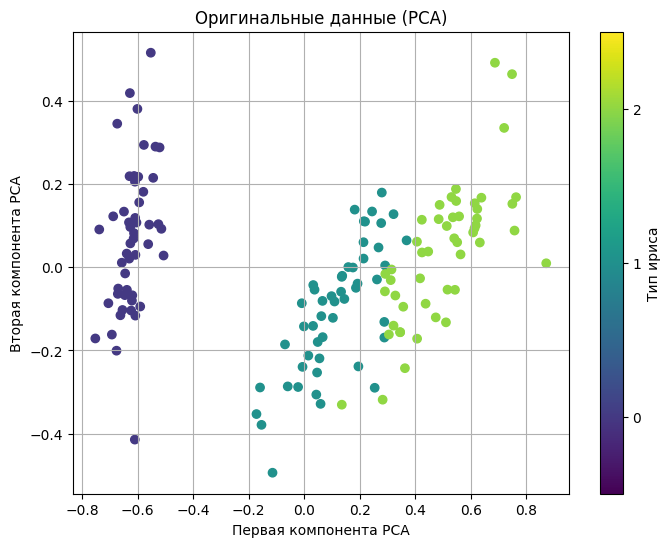

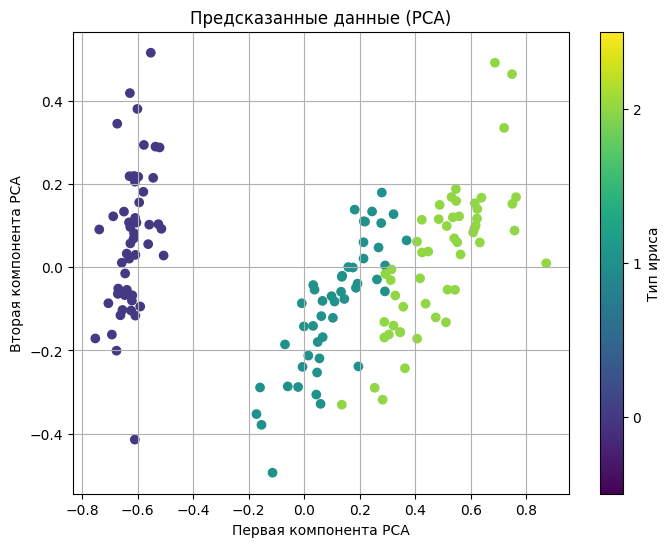

In [87]:
visualize_data(features_normalized, labels_encoded, "Оригинальные данные (PCA)")
y_pred_final = model3.predict(StandardScaler().fit_transform(features_normalized)) 
visualize_data(features_normalized, y_pred_final, "Предсказанные данные (PCA)")